In [223]:
#!pip install pandas

In [224]:
#pip install --upgrade pip

In [225]:
#!pip install matplotlib

In [226]:
# Install seaborn if not already installed
#%pip install seaborn

In [227]:
# Install scikit-learn if not already installed
#%pip install scikit-learn

In [ ]:
# Install xgboost if not already installed
#%pip install xgboost

In [284]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix # Import precision_score and recall_score
from xgboost import XGBClassifier     

In [229]:
# Read multiple CSV files
calendar = pd.read_csv("../data/dim_calendar.csv")  # Calendar File
customer = pd.read_csv("../data/dim_customers.csv") # Customers File
location = pd.read_csv("../data/dim_location.csv")  # Location File
payment = pd.read_csv("../data/dim_payments.csv")  # Payments File
transcation = pd.read_csv("../data/dim_transactions.csv")  # Transcations File

In [230]:
calendar.head()

,date_key,day_of_week,month,year,quarter,is_holiday
0,2020-01-01,Wednesday,January,2020,2020Q1,0
1,2020-01-02,Thursday,January,2020,2020Q1,0
2,2020-01-03,Friday,January,2020,2020Q1,0
3,2020-01-04,Saturday,January,2020,2020Q1,1
4,2020-01-05,Sunday,January,2020,2020Q1,1


In [231]:
customer.head()

,customer_id,first_name,last_name,gender,age,dob,email,phone_number,is_churned,days_since_last_purchase,tenure,discount_used,last_purchase_date,purchase_frequency,avg_purchase_value
0,1,Patricia,Macdonald,Female,51,1973-12-16,wilsonchristopher@hotmail.com,(568)800-3705,1,590,3,0,2022-03-10,49,453.22
1,2,Destiny,Evans,Other,56,1968-07-13,garciarobert@meyers.info,3579858634,0,648,4,0,2024-07-02,23,49.87
2,3,Sarah,Stone,Other,21,2003-09-12,gregorynichols@contreras.info,(233)051-2972x83053,0,1783,10,0,2023-06-24,45,178.78
3,4,Tara,Peterson,Female,25,1999-06-04,wcaldwell@yahoo.com,+1-980-912-2768x5416,1,514,9,0,2022-10-09,48,408.14
4,5,Patrick,Petersen,Female,57,1967-11-21,matthew65@miller.com,001-770-382-4507x93902,0,689,2,1,2020-07-24,4,328.80


In [232]:
location.head()

,location_id,shopping_mall,city,province_state,country
0,1,Mall of America,Bloomington,Minnesota,US
1,2,The Galleria,Houston,Texas,US
2,3,Westfield London,London,England,UK
3,4,Trafford Centre,Manchester,England,UK
4,5,King of Prussia Mall,Philadelphia,Pennsylvania,US


In [233]:
payment.head()

,payment_id,payment_method,card_type,Unnamed: 3
0,1,Credit Card - Visa,Visa,NaN
1,2,Credit Card - MasterCard,MasterCard,NaN
2,3,Credit Card - AMEX,AMEX,NaN
3,4,Debit Card - Visa,Visa,NaN
4,5,Debit Card - MasterCard,MasterCard,NaN


In [234]:
transcation.head()

,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7


In [235]:
calendar.shape

(4018, 6)

In [236]:
calendar.columns

Index(['date_key', 'day_of_week', 'month', 'year', 'quarter', 'is_holiday'], dtype='object')

In [237]:
customer.shape

(999, 15)

In [238]:
customer.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'age', 'dob',
       'email', 'phone_number', 'is_churned', 'days_since_last_purchase',
       'tenure', 'discount_used', 'last_purchase_date', 'purchase_frequency',
       'avg_purchase_value'],
      dtype='object')

In [239]:
location.shape

(60, 5)

In [240]:
location.columns

Index(['location_id', 'shopping_mall', 'city', 'province_state', 'country'], dtype='object')

In [241]:
payment.shape

(10, 4)

In [242]:
payment.columns

Index(['payment_id', 'payment_method', 'card_type', 'Unnamed: 3'], dtype='object')

In [243]:
transcation.shape

(10000, 9)

In [244]:
transcation.columns

Index(['invoice_no', 'category', 'item', 'quantity', 'price', 'location_id',
       'customer_id', 'invoice_date', 'payment_id'],
      dtype='object')

In [245]:
# Merge Calendar and Transaction table
merge_calendar_transaction = transcation.merge(calendar, left_on="invoice_date", right_on="date_key", how="left")
merge_calendar_transaction.head()

,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id,date_key,day_of_week,month,year,quarter,is_holiday
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,2023-03-22,Wednesday,March,2023,2023Q1,0
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,2024-04-06,Saturday,April,2024,2024Q2,1
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,2022-05-31,Tuesday,May,2022,2022Q2,0
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,2021-01-01,Friday,January,2021,2021Q1,0
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,2020-02-10,Monday,February,2020,2020Q1,0


In [246]:
merge_calendar_transaction.shape

(10000, 15)

In [247]:
calendar.shape

(4018, 6)

In [248]:
transcation.shape

(10000, 9)

In [249]:
# Merge New and Customer table
merge_customer_calendar_transaction = merge_calendar_transaction.merge(customer, on="customer_id", how="left")
merge_customer_calendar_transaction.head()

,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id,date_key,...,dob,email,phone_number,is_churned,days_since_last_purchase,tenure,discount_used,last_purchase_date,purchase_frequency,avg_purchase_value
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,2023-03-22,...,1999-07-13,michealbender@gmail.com,(309)938-3205x8088,1.0,1056.0,8.0,0.0,2021-08-15,30.0,280.82
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,2024-04-06,...,1995-01-18,nicholasclark@flowers.net,(363)377-7602,1.0,1494.0,1.0,0.0,2020-01-19,30.0,52.40
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,2022-05-31,...,2002-10-11,geraldcastro@mosley.com,661-041-4070x466,0.0,386.0,6.0,1.0,2021-04-06,42.0,165.90
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,2021-01-01,...,1992-12-29,vguerrero@green.org,712-518-4596x428,0.0,482.0,3.0,1.0,2022-05-17,28.0,427.81
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,2020-02-10,...,1989-08-17,qfloyd@gmail.com,249-201-6223,0.0,1309.0,2.0,1.0,2023-01-28,31.0,321.20


In [250]:
customer.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'age', 'dob',
       'email', 'phone_number', 'is_churned', 'days_since_last_purchase',
       'tenure', 'discount_used', 'last_purchase_date', 'purchase_frequency',
       'avg_purchase_value'],
      dtype='object')

In [251]:
# Merge New and Location table
merge_location_customer_calendar_transaction = merge_customer_calendar_transaction.merge(location, on="location_id", how="left")
merge_location_customer_calendar_transaction.head()

,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id,date_key,...,days_since_last_purchase,tenure,discount_used,last_purchase_date,purchase_frequency,avg_purchase_value,shopping_mall,city,province_state,country
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,2023-03-22,...,1056.0,8.0,0.0,2021-08-15,30.0,280.82,Mall of America,Bloomington,Minnesota,US
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,2024-04-06,...,1494.0,1.0,0.0,2020-01-19,30.0,52.40,Fashion Show Mall,Las Vegas,Nevada,US
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,2022-05-31,...,386.0,6.0,1.0,2021-04-06,42.0,165.90,Lakeside Shopping Centre,Thurrock,Essex,UK
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,2021-01-01,...,482.0,3.0,1.0,2022-05-17,28.0,427.81,Bullring & Grand Central,Birmingham,West Midlands,UK
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,2020-02-10,...,1309.0,2.0,1.0,2023-01-28,31.0,321.20,The Galleria at Fort Lauderdale,Fort Lauderdale,Florida,US


In [252]:
# Merge New and Location table
dataset = merge_location_customer_calendar_transaction.merge(payment, on="payment_id", how="left")
dataset.to_csv("../data/dataset.csv")
dataset.head()

,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id,date_key,...,last_purchase_date,purchase_frequency,avg_purchase_value,shopping_mall,city,province_state,country,payment_method,card_type,Unnamed: 3
0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,2023-03-22,...,2021-08-15,30.0,280.82,Mall of America,Bloomington,Minnesota,US,Credit Card - MasterCard,MasterCard,NaN
1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,2024-04-06,...,2020-01-19,30.0,52.40,Fashion Show Mall,Las Vegas,Nevada,US,Apple Pay,NaN,NaN
2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,2022-05-31,...,2021-04-06,42.0,165.90,Lakeside Shopping Centre,Thurrock,Essex,UK,Google Pay,NaN,NaN
3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,2021-01-01,...,2022-05-17,28.0,427.81,Bullring & Grand Central,Birmingham,West Midlands,UK,Google Pay,NaN,NaN
4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,2020-02-10,...,2023-01-28,31.0,321.20,The Galleria at Fort Lauderdale,Fort Lauderdale,Florida,US,Cash,NaN,NaN


In [253]:
dataset.columns

Index(['invoice_no', 'category', 'item', 'quantity', 'price', 'location_id',
       'customer_id', 'invoice_date', 'payment_id', 'date_key', 'day_of_week',
       'month', 'year', 'quarter', 'is_holiday', 'first_name', 'last_name',
       'gender', 'age', 'dob', 'email', 'phone_number', 'is_churned',
       'days_since_last_purchase', 'tenure', 'discount_used',
       'last_purchase_date', 'purchase_frequency', 'avg_purchase_value',
       'shopping_mall', 'city', 'province_state', 'country', 'payment_method',
       'card_type', 'Unnamed: 3'],
      dtype='object')

Data Preprocessing

In [254]:
# Drop unnecessary columns
dataset.drop(columns=["invoice_no","location_id","customer_id","payment_id","payment_id","date_key","day_of_week", "first_name","last_name","dob","email","phone_number","shopping_mall","card_type","Unnamed: 3"], inplace=True)

In [255]:
clean_dataset=dataset
clean_dataset.columns

Index(['category', 'item', 'quantity', 'price', 'invoice_date', 'month',
       'year', 'quarter', 'is_holiday', 'gender', 'age', 'is_churned',
       'days_since_last_purchase', 'tenure', 'discount_used',
       'last_purchase_date', 'purchase_frequency', 'avg_purchase_value',
       'city', 'province_state', 'country', 'payment_method'],
      dtype='object')

In [256]:
clean_dataset.isnull().sum()

category                    0
item                        0
quantity                    0
price                       0
invoice_date                0
month                       0
year                        0
quarter                     0
is_holiday                  0
gender                      4
age                         4
is_churned                  4
days_since_last_purchase    4
tenure                      4
discount_used               4
last_purchase_date          4
purchase_frequency          4
avg_purchase_value          4
city                        0
province_state              0
country                     0
payment_method              0
dtype: int64

In [257]:
clean_dataset.isnull().sum() / clean_dataset.shape[0] * 100

category                    0.00
item                        0.00
quantity                    0.00
price                       0.00
invoice_date                0.00
month                       0.00
year                        0.00
quarter                     0.00
is_holiday                  0.00
gender                      0.04
age                         0.04
is_churned                  0.04
days_since_last_purchase    0.04
tenure                      0.04
discount_used               0.04
last_purchase_date          0.04
purchase_frequency          0.04
avg_purchase_value          0.04
city                        0.00
province_state              0.00
country                     0.00
payment_method              0.00
dtype: float64

In [258]:
clean_dataset=clean_dataset.dropna(inplace=False)
clean_dataset.isnull().sum()

category                    0
item                        0
quantity                    0
price                       0
invoice_date                0
month                       0
year                        0
quarter                     0
is_holiday                  0
gender                      0
age                         0
is_churned                  0
days_since_last_purchase    0
tenure                      0
discount_used               0
last_purchase_date          0
purchase_frequency          0
avg_purchase_value          0
city                        0
province_state              0
country                     0
payment_method              0
dtype: int64

In [259]:
clean_dataset.duplicated().sum()

np.int64(0)

Preprocessing Data

In [260]:
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9996 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   category                  9996 non-null   object 
 1   item                      9996 non-null   object 
 2   quantity                  9996 non-null   int64  
 3   price                     9996 non-null   float64
 4   invoice_date              9996 non-null   object 
 5   month                     9996 non-null   object 
 6   year                      9996 non-null   int64  
 7   quarter                   9996 non-null   object 
 8   is_holiday                9996 non-null   int64  
 9   gender                    9996 non-null   object 
 10  age                       9996 non-null   float64
 11  is_churned                9996 non-null   float64
 12  days_since_last_purchase  9996 non-null   float64
 13  tenure                    9996 non-null   float64
 14  discount_used

In [261]:
# Convert Data Types
clean_dataset["is_churned"] = clean_dataset["is_churned"].astype(int)
clean_dataset['invoice_date'] = pd.to_datetime(clean_dataset['invoice_date'])
clean_dataset['last_purchase_date'] = pd.to_datetime(clean_dataset['last_purchase_date'])

C:\Users\QC\AppData\Local\Temp\ipykernel_12212\519188912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dataset["is_churned"] = clean_dataset["is_churned"].astype(int)
C:\Users\QC\AppData\Local\Temp\ipykernel_12212\519188912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dataset['invoice_date'] = pd.to_datetime(clean_dataset['invoice_date'])
C:\Users\QC\AppData\Local\Temp\ipykernel_12212\519188912.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [262]:
features = clean_dataset.columns
for feature in features:
     print(f'{feature}--->{clean_dataset[feature].nunique()}')

category--->4
item--->12
quantity--->4
price--->5179
invoice_date--->1866
month--->12
year--->6
quarter--->21
is_holiday--->2
gender--->3
age--->53
is_churned--->2
days_since_last_purchase--->783
tenure--->10
discount_used--->2
last_purchase_date--->782
purchase_frequency--->50
avg_purchase_value--->988
city--->50
province_state--->31
country--->4
payment_method--->10


In [263]:
def unique_values_names(clean_dataset):
    for column in clean_dataset:
        if clean_dataset[column].dtype=='object':
            print(f'{column}:{clean_dataset[column].unique()}')

unique_values_names(clean_dataset)    

category:['Hair Care' 'Body Care and Hygiene' 'Skin Care' 'Oral Care']
item:['Hair Oil' 'Deodorant' 'Face Wash' 'Body Lotion' 'Toothpaste'
 'Hand Sanitizer' 'Moisturizer' 'Shampoo' 'Conditioner' 'Mouthwash'
 'Sunscreen' 'Lip Balm']
month:['March' 'April' 'May' 'January' 'February' 'December' 'June' 'July'
 'November' 'September' 'August' 'October']
quarter:['2023Q1' '2024Q2' '2022Q2' '2021Q1' '2020Q1' '2023Q2' '2020Q4' '2022Q1'
 '2021Q4' '2020Q2' '2020Q3' '2024Q1' '2025Q1' '2024Q4' '2024Q3' '2022Q3'
 '2022Q4' '2021Q2' '2023Q4' '2021Q3' '2023Q3']
gender:['Female' 'Male' 'Other']
city:['Bloomington' 'Las Vegas' 'Thurrock' 'Birmingham' 'Fort Lauderdale'
 'Denver' 'Nashua' 'Boca Raton' 'Sheffield' 'Los Angeles' 'Palo Alto'
 'Lone Tree' 'New York' 'Reading' 'Durham' 'Costa Mesa' 'Scottsdale'
 'Glendale' 'Tampa' 'London' 'Manchester' 'Frisco' 'Toronto' 'Columbus'
 'Bellevue' 'Cambridge' 'Dallas' 'Philadelphia' 'Gateshead' 'Ottawa'
 'McLean' 'Orlando' 'San Antonio' 'Dartford' 'Austin' 'Atlant

In [264]:
# Convert categorical columns to numeric using one-hot encoding
categorical_columns = ['category', 'item', 'month', 'quarter', 'gender', 'city', 'province_state', 'country', 'payment_method']
clean_dataset_encoded = pd.get_dummies(clean_dataset, columns=categorical_columns, drop_first=True)

clean_dataset_encoded.head()

,quantity,price,invoice_date,year,is_holiday,age,is_churned,days_since_last_purchase,tenure,discount_used,...,country_US,payment_method_BNPL (Buy Now,payment_method_Cash,payment_method_Credit Card - AMEX,payment_method_Credit Card - MasterCard,payment_method_Credit Card - Visa,payment_method_Debit Card - MasterCard,payment_method_Debit Card - Visa,payment_method_Google Pay,payment_method_PayPal
0,1,17.45,2023-03-22,2023,0,25.0,1,1056.0,8.0,0.0,...,True,False,False,False,True,False,False,False,False,False
1,4,20.81,2024-04-06,2024,1,30.0,1,1494.0,1.0,0.0,...,True,False,False,False,False,False,False,False,False,False
2,4,40.96,2022-05-31,2022,0,22.0,0,386.0,6.0,1.0,...,False,False,False,False,False,False,False,False,True,False
3,2,27.50,2021-01-01,2021,0,32.0,0,482.0,3.0,1.0,...,False,False,False,False,False,False,False,False,True,False
4,1,16.43,2020-02-10,2020,0,35.0,0,1309.0,2.0,1.0,...,True,False,True,False,False,False,False,False,False,False


In [265]:
# Apply label encoding to categorical variables
label_encoders = {}
categorical_columns = ['category', 'item', 'month', 'quarter', 'gender', 'city', 'province_state', 'country', 'payment_method']

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    clean_dataset[column] = label_encoders[column].fit_transform(clean_dataset[column])

encode_dataset=clean_dataset
encode_dataset.head()

C:\Users\QC\AppData\Local\Temp\ipykernel_12212\3102785372.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dataset[column] = label_encoders[column].fit_transform(clean_dataset[column])
C:\Users\QC\AppData\Local\Temp\ipykernel_12212\3102785372.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dataset[column] = label_encoders[column].fit_transform(clean_dataset[column])
C:\Users\QC\AppData\Local\Temp\ipykernel_12212\3102785372.py:7: SettingWithCopyWarning: 
A value is trying to be set on a co

,category,item,quantity,price,invoice_date,month,year,quarter,is_holiday,gender,...,days_since_last_purchase,tenure,discount_used,last_purchase_date,purchase_frequency,avg_purchase_value,city,province_state,country,payment_method
0,1,4,1,17.45,2023-03-22,7,2023,12,0,0,...,1056.0,8.0,0.0,2021-08-15,30.0,280.82,5,16,3,4
1,0,2,4,20.81,2024-04-06,0,2024,17,1,1,...,1494.0,1.0,0.0,2020-01-19,30.0,52.40,24,17,3,0
2,3,3,4,40.96,2022-05-31,8,2022,9,0,0,...,386.0,6.0,1.0,2021-04-06,42.0,165.90,47,8,2,8
3,0,0,2,27.50,2021-01-01,4,2021,4,0,2,...,482.0,3.0,1.0,2022-05-17,28.0,427.81,4,30,2,8
4,2,11,1,16.43,2020-02-10,3,2020,0,0,2,...,1309.0,2.0,1.0,2023-01-28,31.0,321.20,18,9,3,2


In [266]:
# Initialize the StandardScaler
standard_scaler = StandardScaler()
numeric_columns = ['quantity', 'price', 'city','province_state','category','item','country','gender','age','days_since_last_purchase', 'tenure', 'discount_used', 'purchase_frequency', 'avg_purchase_value']
# Apply StandardScaler to numeric columns
clean_dataset[numeric_columns] = standard_scaler.fit_transform(clean_dataset[numeric_columns])

clean_dataset.head()

C:\Users\QC\AppData\Local\Temp\ipykernel_12212\2265074251.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dataset[numeric_columns] = standard_scaler.fit_transform(clean_dataset[numeric_columns])


,category,item,quantity,price,invoice_date,month,year,quarter,is_holiday,gender,...,days_since_last_purchase,tenure,discount_used,last_purchase_date,purchase_frequency,avg_purchase_value,city,province_state,country,payment_method
0,-0.492212,-0.434651,-1.329329,-0.556567,2023-03-22,7,2023,12,0,-1.231895,...,0.276452,0.821493,-1.01147,2021-08-15,0.321027,0.222337,-1.379642,0.229604,0.512176,4
1,-1.331398,-1.014689,1.345922,-0.419208,2024-04-06,0,2024,17,1,-0.001969,...,1.112575,-1.585001,-1.01147,2020-01-19,0.321027,-1.381148,-0.046822,0.346322,0.512176,0
2,1.186161,-0.724670,1.345922,0.404538,2022-05-31,8,2022,9,0,-1.231895,...,-1.002549,0.133923,0.98866,2021-04-06,1.143984,-0.584390,1.566593,-0.704133,-0.680674,8
3,-1.331398,-1.594727,-0.437578,-0.145716,2021-01-01,4,2021,4,0,1.227957,...,-0.819289,-0.897431,0.98866,2022-05-17,0.183867,1.254192,-1.449791,1.863644,-0.680674,8
4,0.346975,1.595481,-1.329329,-0.598265,2020-02-10,3,2020,0,0,1.227957,...,0.759418,-1.241216,0.98866,2023-01-28,0.389607,0.505801,-0.467713,-0.587415,0.512176,2


In [267]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Select numeric columns to normalize
numeric_columns = clean_dataset_encoded.select_dtypes(include=['float64', 'int64']).columns

# Apply Min-Max scaling
clean_dataset_encoded[numeric_columns] = scaler.fit_transform(clean_dataset_encoded[numeric_columns])

clean_dataset_encoded.head()

,quantity,price,invoice_date,year,is_holiday,age,is_churned,days_since_last_purchase,tenure,discount_used,...,country_US,payment_method_BNPL (Buy Now,payment_method_Cash,payment_method_Credit Card - AMEX,payment_method_Credit Card - MasterCard,payment_method_Credit Card - Visa,payment_method_Debit Card - MasterCard,payment_method_Debit Card - Visa,payment_method_Google Pay,payment_method_PayPal
0,0.000000,0.157567,2023-03-22,0.6,0.0,0.134615,1.0,0.578716,0.777778,0.0,...,True,False,False,False,True,False,False,False,False,False
1,1.000000,0.191856,2024-04-06,0.8,1.0,0.230769,1.0,0.818980,0.000000,0.0,...,True,False,False,False,False,False,False,False,False,False
2,1.000000,0.397490,2022-05-31,0.4,0.0,0.076923,0.0,0.211190,0.555556,1.0,...,False,False,False,False,False,False,False,False,True,False
3,0.333333,0.260129,2021-01-01,0.2,0.0,0.269231,0.0,0.263851,0.222222,1.0,...,False,False,False,False,False,False,False,False,True,False
4,0.000000,0.147158,2020-02-10,0.0,0.0,0.326923,0.0,0.717499,0.111111,1.0,...,True,False,True,False,False,False,False,False,False,False


In [268]:
clean_dataset=dataset
clean_dataset.to_csv("../data/clean data/clean_dataset.csv")
clean_dataset.head(1)

,category,item,quantity,price,invoice_date,month,year,quarter,is_holiday,gender,...,days_since_last_purchase,tenure,discount_used,last_purchase_date,purchase_frequency,avg_purchase_value,city,province_state,country,payment_method
0,Hair Care,Hair Oil,1,17.45,2023-03-22,March,2023,2023Q1,0,Female,...,1056.0,8.0,0.0,2021-08-15,30.0,280.82,Bloomington,Minnesota,US,Credit Card - MasterCard


Exploratory Data Analysis (EDA)

C:\Users\QC\AppData\Local\Temp\ipykernel_12212\881250669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=clean_dataset["is_churned"], palette="coolwarm")


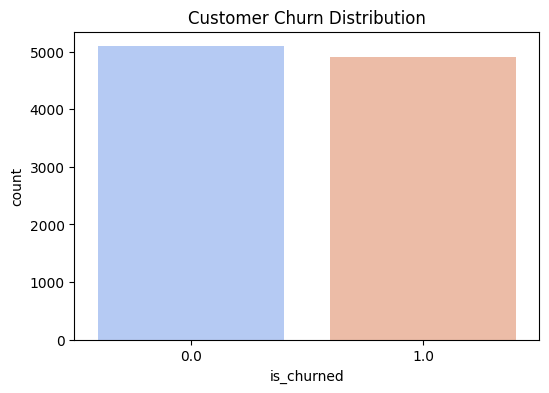

In [269]:
# Churn Rate Visualization
plt.figure(figsize=(6,4))
sns.countplot(x=clean_dataset["is_churned"], palette="coolwarm")
plt.title("Customer Churn Distribution")
plt.show()

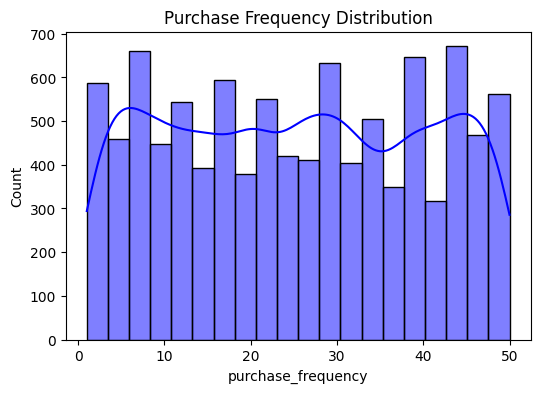

In [270]:
# Purchase Frequency Distribution
plt.figure(figsize=(6,4))
sns.histplot(clean_dataset["purchase_frequency"], bins=20, kde=True, color="blue")
plt.title("Purchase Frequency Distribution")
plt.show()

Extract Input, Output Variables

In [271]:
# Define features and target variable

# Features or Input data or Independent Variable
x = clean_dataset_encoded.drop(["invoice_date","is_churned","last_purchase_date"], axis=1)

# Target(1 = churned, 0 = Not churned) or Output data or Dependent Variable
y = clean_dataset_encoded["is_churned"]

# Check if is_chrned Column is removed
x.head()
     

,quantity,price,year,is_holiday,age,days_since_last_purchase,tenure,discount_used,purchase_frequency,avg_purchase_value,...,country_US,payment_method_BNPL (Buy Now,payment_method_Cash,payment_method_Credit Card - AMEX,payment_method_Credit Card - MasterCard,payment_method_Credit Card - Visa,payment_method_Debit Card - MasterCard,payment_method_Debit Card - Visa,payment_method_Google Pay,payment_method_PayPal
0,0.000000,0.157567,0.6,0.0,0.134615,0.578716,0.777778,0.0,0.591837,0.557305,...,True,False,False,False,True,False,False,False,False,False
1,1.000000,0.191856,0.8,1.0,0.230769,0.818980,0.000000,0.0,0.591837,0.095757,...,True,False,False,False,False,False,False,False,False,False
2,1.000000,0.397490,0.4,0.0,0.076923,0.211190,0.555556,1.0,0.836735,0.325096,...,False,False,False,False,False,False,False,False,True,False
3,0.333333,0.260129,0.2,0.0,0.269231,0.263851,0.222222,1.0,0.551020,0.854314,...,False,False,False,False,False,False,False,False,True,False
4,0.000000,0.147158,0.0,0.0,0.326923,0.717499,0.111111,1.0,0.612245,0.638897,...,True,False,True,False,False,False,False,False,False,False


Split Dataset

In [272]:

# Train-test split (70-30 ratio)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape, x_test.shape

((6997, 148), (2999, 148))

Train Model 

In [275]:

# Initialize and train the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

Model Evaluation

In [277]:
# Predictions
y_pred = model.predict(x_test)
# Actual Vs Predicted Output
print("Actual Output:\n   ", y_test[:5])
print("Predicted Output:", y_pred[:5])

Actual Output:
    6196    1.0
881     1.0
9030    1.0
6634    1.0
2915    1.0
Name: is_churned, dtype: float64
Predicted Output: [0. 0. 0. 1. 0.]


In [279]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Full classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.51
Precision: 0.52
Recall: 0.44
              precision    recall  f1-score   support

         0.0       0.51      0.59      0.55      1493
         1.0       0.52      0.44      0.48      1506

    accuracy                           0.51      2999
   macro avg       0.52      0.51      0.51      2999
weighted avg       0.52      0.51      0.51      2999



In [286]:
xgb_model =XGBClassifier()
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
print("XGboost Classifier")
print("---"*30)
xgb_accuracy=round(accuracy_score(y_test,y_pred_xgb)*100,2)
print("accuracy",xgb_accuracy,"%")

XGboost Classifier
------------------------------------------------------------------------------------------
accuracy 99.6 %


In [289]:
# Train XGBoost Model
xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(x_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(x_test)

xgb_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {xgb_accuracy:.2f}")

Accuracy: 0.96


In [274]:
# Example: Join customers and orders on 'customer_id'
merged_df1 = pd.merge(df4, df3, on="payment_id", how="inner")  # Inner Join
merged_df1.head()

NameError: name 'df4' is not defined

In [ ]:
merged_df1.count()

In [ ]:

merged_df2 = pd.merge(merged_df1, df2, on="location_id", how="inner")  # Inner Join
merged_df2.head()

In [ ]:
merged_df2.count()

In [ ]:
merged_df3 = pd.merge(merged_df2, df1, on="customer_id", how="left")  # Inner Join
merged_df3.head()

In [ ]:
merged_df3.count()

In [ ]:
merged_df3['first_name']

In [ ]:
merged_df3.to_csv("fact_customer.csv")

In [ ]:
merged_df3.count()

In [ ]:
df1.count()